# Representing Signals Data

There are multiple ways to represent time series signals data.
- Some are good, some are bad, some are convenient

In this notebook we will look at signals data in the:
1. Time Domain
2. Frequency Domain
3. Time/Frequency Domain



# The Time Domain 

Visualizing a signal in the time domain is often most intuitive at first, and gives some indication of signal strength (e.g., volumne) and duration.  The plot below shows an audio signal in the time domain.  In this section we will learn how to build a complex signal, and then later we'll learn how to decompose it!

<img src = "https://raw.githubusercontent.com/BeaverWorksMedlytics/Week2_public/master/imgs/sound_time_series.png">





### Sinusoids: the basic building block of time series

Sinusoids are special
- Simplest waveform – a single frequency

A sinusoid is represented by the equation:

&emsp;&emsp;$y(t) = a(t) sin (2\pi ft+\phi) = a(t) sin (\omega t+\phi)$ 

where:

* $a(t) = $ amplitude
* $f = $ ordinary frequency, or number of oscillations that occur each second of time (Hz)
* $\omega = 2\pi f$, the angular frequency (radians per second)
* $\phi =$ phase
     
Its simplicity makes sinusoids excellent building blocks for many time series.

Let's look at an example.

In [46]:
# The first time you run this notebook, you will need to clone the repo to Colab (then restart runtime)
! git clone https://github.com/BeaverWorksMedlytics/Week2_public.git



Cloning into 'Week2_public'...
remote: Counting objects: 45, done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 45 (delta 9), reused 32 (delta 5), pack-reused 0
Unpacking objects: 100% (45/45), done.


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.io.wavfile
from IPython.display import Audio

%matplotlib inline
matplotlib.rcParams.update({'font.size': 16})



In [48]:
import os
os.chdir('Week2_public')
os.listdir()

['01_TimeSeries_Exercise1.ipynb',
 '00_SIR.ipynb',
 'multiTimeline.csv',
 'ecg.txt',
 '02_TimeSeries_Exercise2.ipynb',
 'sounds',
 'README.md',
 '.git',
 '03_SignalsProcessing.ipynb',
 'imgs']

(-1, 1)

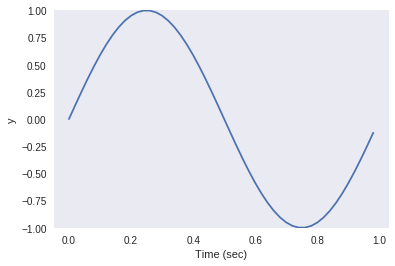

In [49]:
n_sec = 1                         # number of seconds to plot
n_points = 50                     # number of points per second

a = 1                             # amplitude
f = 1                             # one oscillation per second
omega = 2*np.pi*f                 # angular frequency
phi = 0                           # phase

t = np.arange(n_sec*n_points)/n_points    # time axis
y = a*np.sin(omega*t + phi)       # sinusoid

# PLOT
plt.plot(t,y)
plt.xlabel('Time (sec)')
plt.ylabel('y')
plt.grid()
plt.ylim([-1,1])

We can combine multiple sinusoids to create more complex signals.

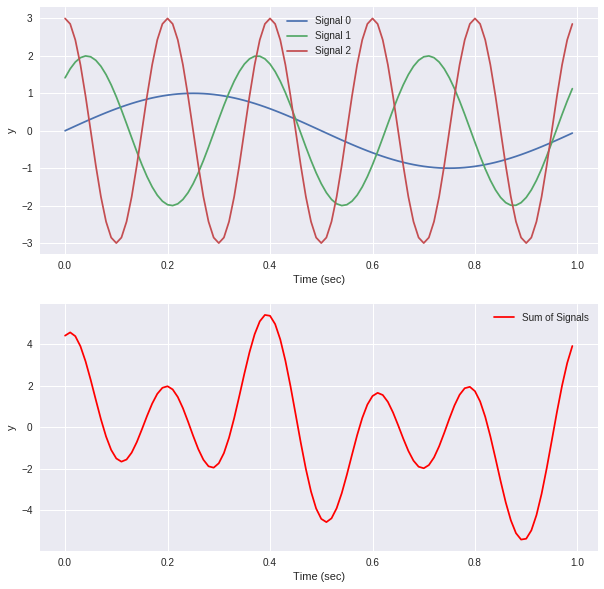

In [50]:
n_sec = 1                         # number of seconds to plot
n_points = 100                    # number of points per second
t = np.arange(n_sec*n_points)/n_points    # time 


# Let's combine three sinusoids
n_signals = 3
y_sum = np.zeros((len(t),))
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
for s in range(n_signals):
    a = s+1                  # amplitude
    f = 2*s+1                # oscillations per second
    omega = 2*np.pi*f        # angular frequency
    phi = np.pi/4*s          # phase
    
    y= a*np.sin(omega*t + phi)
    y_sum += y
    
    plt.plot(t,y,label='Signal {}'.format(s))
    
plt.xlabel('Time (sec)')
plt.ylabel('y')
plt.legend()

# Plot the sum of the signals
plt.subplot(2,1,2)
plt.plot(t,y_sum,'r',label='Sum of Signals')
plt.xlabel('Time (sec)')
plt.ylabel('y')
plt.legend()


### Approximating a Square Wave

As you've seen, we can create arbitrary signals by combining multiple sinusoid waves.  Let's practice approximating a square wave!

Using Fourier expansion, an ideal square wave with an amplitude of 1 can be represented as an infinite sum of sinusoidal waves:

&emsp;&emsp;$y ( t ) = \frac{4}{\pi} \sum_{k=1}^\infty \frac{sin ⁡ ( 2 \pi ( 2 k − 1 ) f t )}{ 2 k − 1} = \frac{4}{ \pi} ( sin ⁡ ( 2 \pi f t ) + \frac{1}{3} sin ⁡ ( 6 \pi f t ) + \frac{1}{5} sin ⁡ ( 10 \pi f t ) + ⋯ )$

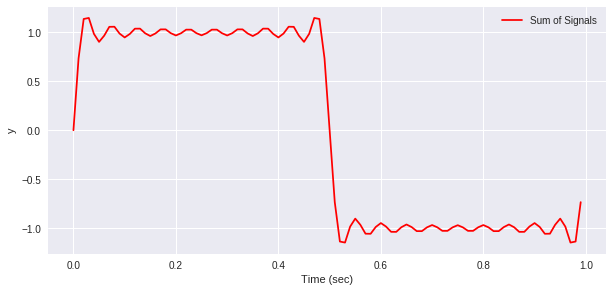

In [67]:
n_sec = 1                         # number of seconds to plot
n_points = 100                    # number of points per second
t = np.arange(n_sec*n_points)/n_points    # time 
a = 4/np.pi

# Let's combine three sinusoids
n_signals = 10
y_sum = np.zeros((len(t),))
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)

for k in range(1,n_signals+1):
    omega = 2 * np.pi * (2*k-1)
    y = a *(np.sin(omega*t)/(2*k-1))
    y_sum += y
        

# Plot the sum of the signals
plt.plot(t,y_sum,'r',label='Sum of Signals')
plt.xlabel('Time (sec)')
plt.ylabel('y')
plt.legend()


Those little peaks near the corners are caused by what's known as the [Gibbs Phenomenon](https://en.wikipedia.org/wiki/Gibbs_phenomenon). As long as we have a finite number of terms, no matter how many, we will have Gibbs phenomena.

## Fun with Sounds 
Let's have some fun with sounds, and hear what some of these sinusoids sound like. 

Important fact for this experiment: The human hearing range is about from 20 Hz to 20 kHz, although it's fairly common for [people who are over 25 years of age to not be able to hear above 15kHz](http://www.noiseaddicts.com/2009/03/can-you-hear-this-hearing-test/).

If you're musically inclined, "middle C" is approximately 262 Hz.  More note frequencies can be found [here](https://pages.mtu.edu/~suits/notefreqs.html).

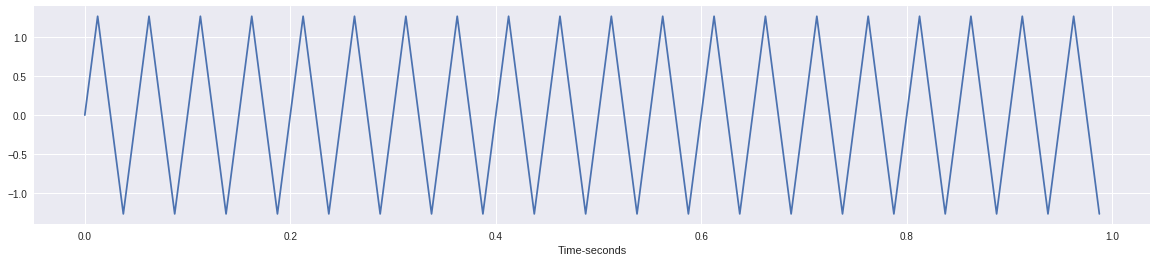

In [52]:
n_sec = 1              # number of seconds
f = 20.               # frequency (in Hz)
omega = 2*np.pi*f      # angular frequency (rad/sec)
phi = 0                # phase
n_points = f*n_sec*4   # number of points -- must be greater than f*n_sec*2

t = np.arange(n_sec*n_points)/n_points    
y = a*np.sin(omega*t + phi)       

plt.figure(figsize=(20,4))
plt.plot(t,y)
plt.xlabel('Time-seconds')
plt.grid(True)
Audio(data=y, rate=n_points)

### Beats
If you combine two signals with very similar frequencies, you may induce *beats*.

<img src = "https://raw.githubusercontent.com/BeaverWorksMedlytics/Week2_public/master/imgs/beats.gif">



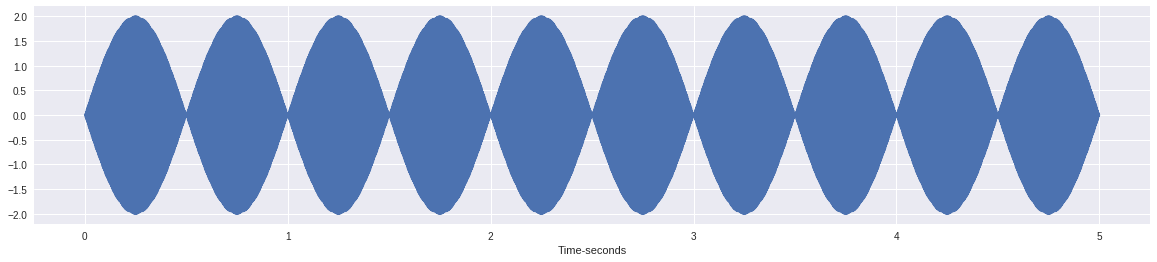

In [53]:
f = 262                # base frequency (Hz)
f_diff = 30             # frequency difference (Hz)


n_sec = 5              # number of seconds
omega1 = 2*np.pi*f     # angular frequency (rad/sec)
omega2 = 2*np.pi*(f+f_diff)    

n_points = (f+f_diff)*n_sec*4   # number of points -- must be greater than (f+f_diff)*n_sec*2
t = np.arange(n_sec*n_points)/n_points    
y = np.sin(omega1*t) + np.sin(omega2*t+np.pi)  

plt.figure(figsize=(20,4))
plt.plot(t,y)
plt.xlabel('Time-seconds')
plt.grid(True)
Audio(data=y, rate=n_points)

### Signal-in-a-signal (just for fun!)

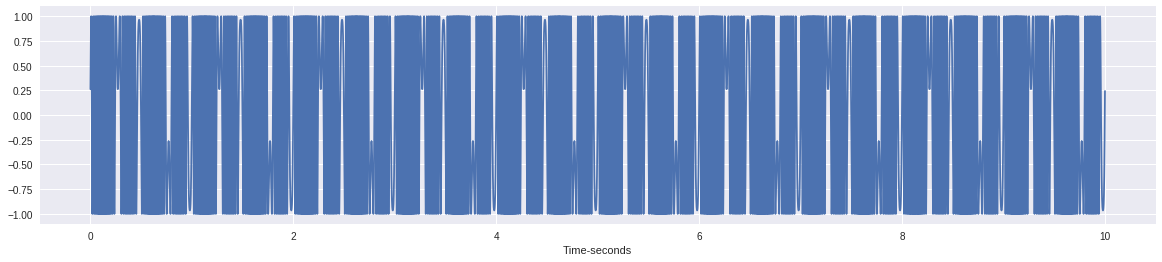

In [59]:
n_sec = 10
n_points = 8000
t = np.arange(n_sec*n_points)/n_points    
y = np.sin(50*np.pi*t-50*np.cos(4*np.pi*t))

plt.figure(figsize=(20,4))
plt.plot(t,y)
plt.xlabel('Time-seconds')
plt.grid(True)
Audio(data=y, rate=n_points)

#### Exercise

Let's play with more sounds.  Here is what "ah" sound looks like:

Text(0,0.5,'amplitude')

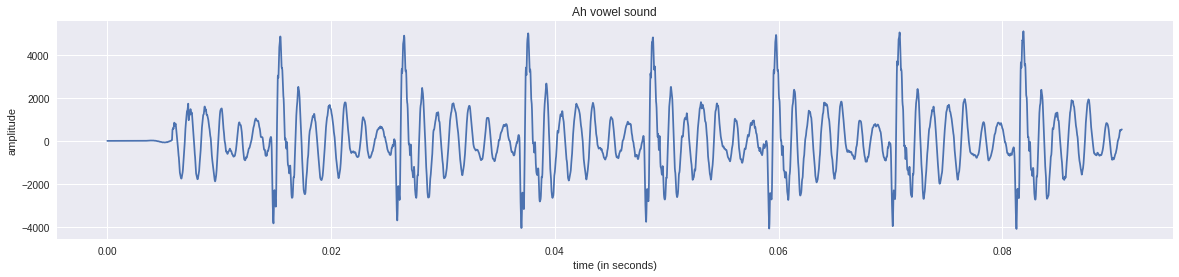

In [60]:
(sample_rate, input_signal) = scipy.io.wavfile.read("./sounds/vowel_ah.wav")

t = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)

plt.figure(figsize=(20,4))
plt.plot(t[0:4000], input_signal[0:4000])
plt.title('Ah vowel sound')
plt.xlabel('time (in seconds)')
plt.ylabel('amplitude')

Now let's play the sound!

In [61]:
Audio(data=input_signal, rate=sample_rate)

In [57]:
# for reference, this is what it should sound like
Audio("./sounds/vowel_ah.wav")

### Okay, just one more!...

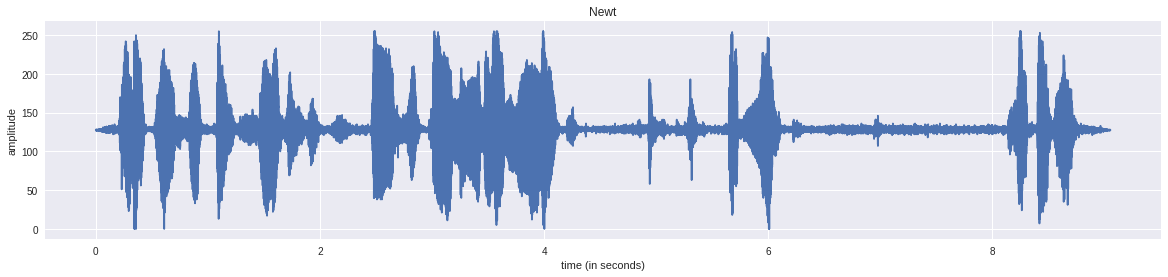

In [58]:
(sample_rate, input_signal) = scipy.io.wavfile.read("./sounds/newt.wav")

t = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)

plt.figure(figsize=(20,4))
plt.plot(t, input_signal)
plt.title('Newt')
plt.xlabel('time (in seconds)')
plt.ylabel('amplitude')

Audio(data=input_signal, rate=sample_rate)

# Frequency Domain Representation

Another useful representation is the frequency domain
- Provides an alternative representation
- Is very mathematically convenient!

Time series can be decomposed in terms of sinusoidal building blocks called the *spectrum*.


<img src = "https://raw.githubusercontent.com/BeaverWorksMedlytics/Week2_public/master/imgs/sound_frequencies.png">

In a subsequent lesson we will learn how to use the [Fourier Transform](https://en.wikipedia.org/wiki/Fourier_transform) to decompose time series data into its frequency spectrum.

There is no temporal information in the spectrum, only frequencies
- Not that great of a representation for dynamically changing sounds (e.g., speech and music)
- Can display some information about the energy and the length of the signal, but not what it sounds like!

<img src = "https://raw.githubusercontent.com/BeaverWorksMedlytics/Week2_public/master/imgs/sound_time_series_2.png">




# Time/Frequency Representation

Many names/varieties
- Spectrogram, sonogram, periodogram, ...

A time-ordered sequence of frequency compositions
- Can help show how things change in both time and frequency

Most useful representation so far!
- Reveals information about both the time and frequency content without loss

<img src = "https://raw.githubusercontent.com/BeaverWorksMedlytics/Week2_public/master/imgs/sound_time_plus_frequencies.png">

###  A Real Example

Time domain
- We see the events
- What do they sound like though?

Frequency domain
- We see bass and mids
- Where are they though?

Spectrogram
- We "see" all the sounds
- And have a sense of how they sound!

<img src = "https://raw.githubusercontent.com/BeaverWorksMedlytics/Week2_public/master/imgs/sound_real_example.png">

We will work more in the frequency and time/frequency domains later, but for now just be aware that they exist (and are useful)!

<img src = "https://raw.githubusercontent.com/BeaverWorksMedlytics/Week2_public/master/imgs/doge.jpg" alt="doge" style="width:200px;height:200px;">
